In [2]:
# Load the main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.feature_selection import SelectPercentile, chi2, SelectKBest, RFE, RFECV, VarianceThreshold
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import scale, StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
import re
from sklearn.base import TransformerMixin
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
import pydotplus

In [4]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [5]:
# Import dataset
df = pd.read_table('Data/Charitable Donations/cup98LRN.txt', sep = ',', low_memory = False, na_values = ' ')

### Explore original dataset, then create a balanced subset

In [6]:
# View the original dataset
df.head()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,CLUSTER,AGE,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,NUMCHLD,INCOME,GENDER,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLP3,SOLIH,MAJOR,WEALTH2,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_15,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_20,ADATE_21,ADATE_22,ADATE_23,ADATE_24,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RDATE_3,RDATE_4,RDATE_5,RDATE_6,RDATE_7,RDATE_8,RDATE_9,RDATE_10,RDATE_11,RDATE_12,RDATE_13,RDATE_14,RDATE_15,RDATE_16,RDATE_17,RDATE_18,RDATE_19,RDATE_20,RDATE_21,RDATE_22,RDATE_23,RDATE_24,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,RAMNT_13,RAMNT_14,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,NaN,NaN,3712,0,NaN,NaN,NaN,NaN,XXXX,T2,36.0,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,39,34,18,10,2,1,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,

In [7]:
# View the TARGET_B variable
df.TARGET_B.mean()

0.05075881440489666

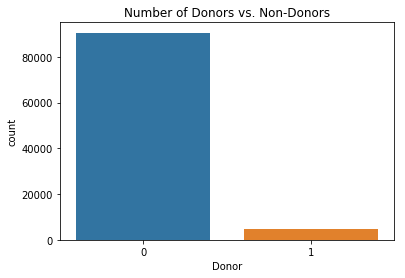

In [8]:
sns.countplot(data = df, x = 'TARGET_B')
plt.xlabel('Donor')
plt.title('Number of Donors vs. Non-Donors')
plt.show()


Since the dataset is highly imbalanced (only 5% of the samples are donors), I'll create a balanced subset to make it 
easier for modeling later. 

In [9]:
# Subset where TARGET_B is 1
df_target1 = df.loc[df.TARGET_B == 1]
# Subset where TARGET_B is 0. Randomly select 5000 samples
df_target0 = df.loc[df.TARGET_B == 0].sample(n = 5000, replace = False, random_state = 123)
# Concatenate these two subsets to create a subset where TARGET_B has both 0 adn 1 values
df_subset = pd.concat([df_target1, df_target0])
df_subset.shape


(9843, 481)

In [10]:
# Check the share of donors in the new dataset
df_subset.TARGET_B.mean()

0.4920247891902875

Now 49% of the samples are donors

# Basic Data Cleaning

In [11]:
df_subset.head()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,CLUSTER,AGE,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,NUMCHLD,INCOME,GENDER,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLP3,SOLIH,MAJOR,WEALTH2,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_15,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_20,ADATE_21,ADATE_22,ADATE_23,ADATE_24,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RDATE_3,RDATE_4,RDATE_5,RDATE_6,RDATE_7,RDATE_8,RDATE_9,RDATE_10,RDATE_11,RDATE_12,RDATE_13,RDATE_14,RDATE_15,RDATE_16,RDATE_17,RDATE_18,RDATE_19,RDATE_20,RDATE_21,RDATE_22,RDATE_23,RDATE_24,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,RAMNT_13,RAMNT_14,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
20,8701,BBK,2,MN,55125,NaN,NaN,3601,0,NaN,NaN,NaN,NaN,XXXX,S1,12.0,62.0,E,H,NaN,NaN,NaN,NaN,NaN,3.0,F,8.0,10,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2,25,40,27,11,4,1,NaN,NaN,NaN,NaN,3.0,NaN,NaN,Y,NaN,NaN,NaN,NaN,Y,Y,NaN,Y,Y,Y,NaN,Y,NaN,NaN,NaN,2.0,X,2707,672,929,99,0,0,45,55,97,1,0,2,1,0,0,0,0,1,0,0,1,0,0,0,35,42,43,37,47,50,27,34,43,23,9,20,27,16,8,6,15,15,13,37,21,14,16,8,15,23,30,47,29,11,2,55,10,13,22,190,267,89,49,1,10,10,8,8,8,0,902,960,8,8,88,12,97,3,11,42,72,60,34,79,21,8,1,7,12,21,5,21,58,17,0,1,0,0,4,35,74,99,0,1,64,63,62,14,4,2,8,0,5,1,7,0,95,96,96,96,5120.0,107.0,613.0,468,501,540,580,20328,6,8,19,23,23,11,7,1,2,4,6,13,27,25,14,8,1,1,14,2,66,1,61,39,20,74,17,2,2,0,0,0,2,4,1,75,20,21,1,67,71,82,62,80,60,80,65,99,0,1,21,20,8,11,17,1,1,10,0,5,3,2,1,0,0,3,23,5,2,4,12,7,3,2,1,14,12,7,5,11,4,1,4,70,10,0,140,5,3,24,21,9,32,7,3,23,3,16,7,1,2,0,12,25,3,40,20,27,7,0,0,2,12,0,0,3,1,4,1,0,0,0,4,0,1,58,95,1,0

### Check missing values. Drop features which have >= 30% of missing values

In [12]:
# Check missing values
missing_percent = []
for col in df_subset.columns:
    percent_missing = df_subset[col].isnull().sum()/len(df_subset) * 100
    missing_percent.append(percent_missing)

missing_table = list(zip(df_subset.columns, missing_percent))
missing_table = pd.DataFrame(missing_table, columns = ['Feature', 'Percent of Missing Values'])
missing_table = missing_table.sort_values(by = 'Percent of Missing Values', ascending = False)
missing_table.head(10)
    

,Feature,Percent of Missing Values
414,RDATE_5,99.979681
436,RAMNT_5,99.979681
11,RECPGVG,99.827288
52,MAJOR,99.715534
50,SOLP3,99.715534
413,RDATE_4,99.593620
435,RAMNT_4,99.593620
434,RAMNT_3,99.512344
412,RDATE_3,99.512344
72,PLATES,99.278675


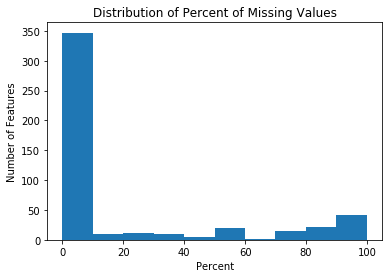

In [13]:
# Plot the distribution of percentage of missing values by feature
plt.hist(x = missing_table['Percent of Missing Values'])
plt.title('Distribution of Percent of Missing Values')
plt.ylabel('Number of Features')
plt.xlabel('Percent')
plt.show()

In [14]:
# View features with >30% missing values
missing_30pct = missing_table.loc[missing_table['Percent of Missing Values'] >= 30]
print (len(missing_30pct))
print (missing_30pct.Feature.unique())

112
['RDATE_5' 'RAMNT_5' 'RECPGVG' 'MAJOR' 'SOLP3' 'RDATE_4' 'RAMNT_4'
 'RAMNT_3' 'RDATE_3' 'PLATES' 'CHILD03' 'HOMEE' 'RAMNT_6' 'RDATE_6' 'CARDS'
 'MAILCODE' 'CHILD07' 'KIDSTUFF' 'CHILD12' 'PVASTATE' 'RECSWEEP' 'BOATS'
 'CHILD18' 'RECP3' 'PHOTO' 'COLLECT1' 'SOLIH' 'FISHER' 'RECINHSE'
 'RDATE_20' 'RAMNT_20' 'CRAFTS' 'CATLG' 'RAMNT_15' 'RDATE_15' 'RAMNT_23'
 'RDATE_23' 'RAMNT_7' 'RDATE_7' 'BIBLE' 'RDATE_21' 'RAMNT_21' 'RAMNT_17'
 'RDATE_17' 'RAMNT_10' 'RDATE_10' 'PCOWNERS' 'VETERANS' 'WALKER' 'NUMCHLD'
 'CDPLAY' 'STEREO' 'GARDENIN' 'PETS' 'RDATE_13' 'RAMNT_13' 'RAMNT_11'
 'RDATE_11' 'GEOCODE' 'RDATE_19' 'RAMNT_19' 'RDATE_9' 'RAMNT_9' 'RAMNT_24'
 'RDATE_24' 'RAMNT_18' 'RDATE_18' 'RDATE_22' 'RAMNT_22' 'RAMNT_8' 'RDATE_8'
 'RDATE_14' 'RAMNT_14' 'RAMNT_12' 'RDATE_12' 'RDATE_16' 'RAMNT_16'
 'ADATE_15' 'RFA_15' 'RFA_23' 'ADATE_23' 'LIFESRC' 'MBCOLECT' 'PUBOPP'
 'MAGMALE' 'MBGARDEN' 'MBCRAFT' 'MBBOOKS' 'PUBPHOTO' 'MAGFEM' 'PUBNEWFN'
 'PUBDOITY' 'PUBHLTH' 'PUBCULIN' 'PUBGARDN' 'MAGFAML' 'RFA_20

In [15]:
# Drop the above features -- those with >= 30% missing values
df_new = df_subset.drop(list(missing_30pct.Feature), axis = 1)
df_new.shape

(9843, 369)

### Explore Categorical Variables

In [16]:
# Find all categorical variables and the values under them
for col in df_new.columns:
    if df_new[col].dtypes == 'object':
        print ('Values in {col}: {xyz}'.format(col = col, xyz = df_new[col].unique()))

Values in OSOURCE: ['BBK' 'SYN' 'DRK' 'BHG' 'L01' 'ARG' 'L04' 'SYC' 'IMP' 'ASC' 'PV3' 'MON'
 'AML' 'FOR' 'DNA' 'ALZ' 'LIS' 'L25' 'HHH' 'APP' 'IMA' 'RPH' 'STA' 'HAN'
 'AHC' 'MBC' 'CWR' 'L15' 'SSS' 'AMB' 'AGR' 'NSH' 'ESN' 'FRC' 'STL' 'DON'
 'AKM' 'YAL' 'L03' 'DCD' 'CNT' 'KIP' 'HOS' nan 'HAM' 'WKB' 'STV' 'SPR'
 'HJR' 'MST' 'COK' 'SHM' 'PRV' 'HHS' 'HCC' 'TRN' 'SPG' 'DBL' 'PCL' 'ASK'
 'DUR' 'FOS' 'SHE' 'MCC' 'LEO' 'RAY' 'OMH' 'LHJ' 'HOW' 'WLW' 'L21' 'MCO'
 'ADD' 'L02' 'BAN' 'OLD' 'BOA' 'PBL' 'TVG' 'HEL' 'CFI' 'MYO' 'ENQ' 'PTP'
 'TRV' 'SGI' 'NAS' 'TVH' 'PME' 'DEL' 'NAD' 'GRI' 'MSE' 'FLM' 'PLU' 'CRG'
 'NEX' 'MAT' 'MAD' 'SUN' 'STR' 'AGS' 'CFF' 'KEN' 'DHR' 'GUR' 'SPN' 'L06'
 'NOR' 'WRG' 'ACT' 'QNT' 'AIR' 'OUL' 'NWN' 'EAS' 'THM' 'SPC' 'SHU' 'TPS'
 'FCR' 'COH' 'UCA' 'MB1' 'VSH' 'TOR' 'TRO' 'USB' 'CRT' 'PBK' 'NSL' 'MBB'
 'HFS' 'ACS' 'DDA' 'RED' 'HSP' 'ASE' 'KNG' 'HHL' 'GPS' 'CHK' 'MM3' 'GDA'
 'DOW' 'MIC' 'BRE' 'VAE' 'SMC' 'RMG' 'TX2' 'GRT' 'LIF' 'ANN' 'NTW' 'JUD'
 'LVT' 'CAW' 'IWD' 'COS' 'SCL' 'HE

* Will drop the RFA features (RFA_2 through RFA_22), as well as OSOURCE, ZIP, STATE, and MDMAUD

In [17]:
#Find all RFA features
drop_vars = list(df_new.columns[df_new.columns.get_loc('RFA_2'):df_new.columns.get_loc('RFA_22')+1])

# Add OSOURCE, ZIP, STATE, MDMAUD to the List the features to drop
drop_vars.extend(['OSOURCE', 'ZIP', 'STATE', 'MDMAUD'])

# Drop the above features                        
df_new = df_new.drop(drop_vars, axis = 1)

df_new.shape

(9843, 350)

In [18]:
# def rfa_split(df, rfa_cols):
#     for col in rfa_cols:
#         df['{col}R'.format(col = col)] = df[col].str[0]  #Get the Recency
#         df['{col}F'.format(col = col)] = df[col].str[1]  #Get the frequency 
#         df['{col}A'.format(col = col)] = df[col].str[2]  #Get the amount
#         df = df.drop(col, 1)  #Drop the original RFA variables after splitting them
#     return df

# X_new = rfa_split(X, rfa_cols)
# X_new.head()

In [19]:
# # Check examples of resulting split columns. Notice that RFA_ _F is of string type. Will need to convert it to numerical later.
# print (X_new.RFA_23R.unique())
# print (X_new.RFA_23F.unique())
# print (X_new.RFA_23A.unique())

In [20]:
# #amount_dict = {'L':0, 'C':1, 'M':2, 'T':'3', 'X':0}
# #frequency_dict = {'1':1,'2':2,'3':3,'4':4,'5':5,'X':0}
# amount_dict = {'A':0, 'B':1, 'C':2, 'D':3,'E':4,'F':5,'G':6,np.nan:0}
# X.RFA_2A = X.RFA_2A.map(amount_dict).astype(int)
# print(X.RFA_2A.unique())

* The DOMAIN feature is a matrix code, which could be broken into 2 varaibles: Urbanicity level of the donor (1st byte), and Socio-economic status of the donor (2nd byte).

In [21]:
# Check current values in the DOMAIN feature
df_new.DOMAIN.unique()

array(['S1', 'T1', 'C1', 'S2', 'T2', 'R2', 'C2', 'U1', 'R3', nan, 'U3',
       'U2', 'C3', 'R1', 'T3', 'S3', 'U4'], dtype=object)

In [22]:
# Split DOMAIN into 2 variables: URBAN and SES
df_new['URBAN'] = df_new['DOMAIN'].str[0]
df_new['SES'] = df_new['DOMAIN'].str[1]
df_new = df_new.drop('DOMAIN', axis = 1)  #Drop the DOMAIN feature after spliting it
print (df_new.URBAN.unique())
print (df_new.SES.unique())   #Notice that SES is of string type. Will need to convert it to numerical later.


['S' 'T' 'C' 'R' 'U' nan]
['1' '2' '3' nan '4']


In [23]:
# Recode nan values in SES as 0, and convert this feature into numeric
df_new.SES = df_new.SES.fillna(0)
df_new.SES = df_new.SES.astype(int)
df_new.SES.value_counts()

2    4697
1    3083
3    1636
0     268
4     159
Name: SES, dtype: int64

In [24]:
# # Recode all the above variables as 0 and 1. Doing this will also turn them into integer type.
# for col in two_level_cat:
#     X[col] = [1 if x in ['Y', 'X', 'B', 'H'] else 0 for x in X[col]]

* The GENDER feature has strange values. Will change them into NaN and impute with the mode later

In [25]:
df_new.GENDER.value_counts()

F    5326
M    3991
U     171
J      50
C       1
A       1
Name: GENDER, dtype: int64

In [26]:
gender_dict = {'F': 1, 'M': 0}
df_new.GENDER = df_new.GENDER.loc[df_new.GENDER.isin(['F', 'M'])].map(gender_dict)
df_new.GENDER.value_counts()

1.0    5326
0.0    3991
Name: GENDER, dtype: int64

* NaN values in other categorical features will be imputed with the mode later.

### Explore Numeric Features

In [27]:
# First, create a list of columns which are numerical
num_cols = []
for col in df_new.columns:
    if df_new[col].dtype in ['int32', 'int64', 'float32', 'float64']:
        num_cols.append(col)
        
#print (num_cols)

In [28]:
df_new[num_cols].describe()

,ODATEDW,TCODE,DOB,CLUSTER,AGE,INCOME,GENDER,HIT,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_11,ADATE_12,ADATE_14,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_22,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2,SES
count,9843.000000,9843.000000,9843.000000,9575.000000,7441.000000,7653.000000,9317.000000,9843.000000,7653.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9832.000000,9832.000000,9832.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.00000,9843.000000

In [29]:
# Drop unimportant numeric features
df_new = df_new.drop(['TCODE','DOB','MSA', 'ADI', 'DMA', 'CONTROLN', 'ADATE_2', 'ADATE_3', 'ADATE_4', 
            'ADATE_6', 'ADATE_7', 'ADATE_8', 'ADATE_9', 'ADATE_11', 'ADATE_12', 'ADATE_14', 
            'ADATE_16', 'ADATE_17','ADATE_18', 'ADATE_19', 'ADATE_22'], axis = 1)
df_new.shape

(9843, 330)

In [30]:
# Check the remaining DATE features
date_cols = []
pattern_date = '.*DATE.*'

for col in df_new.columns:
    if re.match(pattern_date, col):
        date_cols.append(col)
        #X_new[col] = X_new[col].astype(str)
        
print(date_cols)

['ODATEDW', 'MAXADATE', 'MINRDATE', 'MAXRDATE', 'LASTDATE', 'FISTDATE', 'NEXTDATE']


In [31]:
df_new[date_cols].describe()

,ODATEDW,MAXADATE,MINRDATE,MAXRDATE,LASTDATE,FISTDATE,NEXTDATE
count,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,8972.00000
mean,9115.790105,9701.569135,9248.291070,9429.224728,9552.394290,9111.314640,9130.83259
std,345.003257,6.220853,267.527936,186.001608,51.022303,320.412486,297.37499
min,8601.000000,9608.000000,8607.000000,8312.000000,9503.000000,7401.000000,7401.00000
25%,8801.000000,9702.000000,9012.000000,9406.000000,9510.000000,8809.000000,8902.00000
50%,9101.000000,9702.000000,9305.000000,9506.000000,9512.000000,9110.000000,9112.00000
75%,9401.000000,9702.000000,9503.000000,9512.000000,9602.000000,9406.000000,9406.00000
max,9701.000000,9702.000000,9702.000000,9702.000000,9702.000000,9603.000000,9701.00000


In [32]:
# Covert these dates to the number of months difference from July 1998
for col in date_cols:
    df_new[col] = df_new[col].replace(0, None)

def month_cal(YYMM):  #Calculate number of months equivalent for the YYMM
    return int(str(YYMM)[0:2])*12 + int(str(YYMM)[2:4])

def month_diff(input_month, milestone = 9807):
    if input_month is None or np.isnan(input_month):
        return None
    else:
        return month_cal(milestone) - month_cal(input_month) 

for col in date_cols:
    df_new['SINCE_'+ col] = df_new[col].apply(month_diff)

df_new = df_new.drop(date_cols, axis = 1)
df_new.shape

(9843, 330)

In [33]:
df_new.head()

,NOEXCH,CLUSTER,AGE,HOMEOWNR,INCOME,GENDER,HIT,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,TARGET_B,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2,URBAN,SES,SINCE_ODATEDW,SINCE_MAXADATE,SINCE_MINRDATE,SINCE_MAXRDATE,SINCE_LASTDATE,SINCE_FISTDATE,SINCE_NEXTDATE
20,0,12.0,62.0,H,3.0,1.0,10,3.0,2,25,40,27,11,4,1,2707,672,929,99,0,0,45,55,97,1,0,2,1,0,0,0,0,1,0,0,1,0,0,0,35,42,43,37,47,50,27,34,43,23,9,20,27,16,8,6,15,15,13,37,21,14,16,8,15,23,30,47,29,11,2,55,10,13,22,190,267,89,49,1,10,10,8,8,8,0,902,960,8,8,88,12,97,3,11,42,72,60,34,79,21,8,1,7,12,21,5,21,58,17,0,1,0,0,4,35,74,99,0,1,64,63,62,14,4,2,8,0,5,1,7,0,95,96,96,96,468,501,540,580,20328,6,8,19,23,23,11,7,1,2,4,6,13,27,25,14,8,1,1,14,2,66,1,61,39,20,74,17,2,2,0,0,0,2,4,1,75,20,21,1,67,71,82,62,80,60,80,65,99,0,1,21,20,8,11,17,1,1,10,0,5,3,2,1,0,0,3,23,5,2,4,12,7,3,2,1,14,12,7,5,11,4,1,4,70,10,0,140,5,3,24,21,9,32,7,3,23,3,16,7,1,2,0,12,25,3,40,20,27,7,0,0,2,12,0,0,3,1,4,1,0,0,0,4,0,1,58,95,1,0,4,95,69,23,4,13,2,17,35,91,99,1,12,3,93,0,5,1,0,1,99,1,97,99,99,9,2,6,3,26,65,5,12,61.0,15,10,2.0,7.0,5.0,12.0,4.066667,1,4.0,1,L,3,D,X,X,X,3.0,A,S,1,138,17,126,51,28,138,126.0
30,0,35.0,NaN,NaN,NaN,0.0,0,NaN,1,37,58,16,8,1,5,2147,591,640,99,0,0,49,51,94,2,0,3,5,1,0,1,1,0,0,0,3,0,0,2,29,36,37,27,38,40,37,46,37,17,8,34,34,15,6,2,1,18,21,31,19,11,5,0,3,7,23,71,47,15,6,77,5,1,17,286,334,99,99,0,0,0,0,0,0,0,1002,1166,7,5,97,3,96,4,3,63,92,88,59,97,3,4,1,3,5,4,1,30,60,4,1,2,0,4,15,50,94,99,2,0,91,70,72,20,4,0,0,0,3,0,0,0,78,83,99,99,633,638,652,663,19703,2,5,1,17,48,19,7,0,1,3,4,0,16,51,19,7,0,1,5,0,65,3,74,26,25,89,9,0,0,0,0,0,1,2,1,82,34,42,22,70,82,98,67,97,66,68,61,99,99,0,34,23,4,10,12,0,2,9,0,4,1,1,0,0,4,2,25,5,2,4,8,8,8,0,3,10,8,9,4,8,1,5,5,76,4,1,160,0,1,12,25,10,39,13,5,33,6,25,7,1,1,0,19,37,2,58,11,16,10,0,4,1,15,0,0,3,2,0,2,0,0,0,1,0,3,48,97,1,1,1,99,91,24,3,6,6,57,85,95,95,5,0,0,75,0,20,0,0,5,96,4,90,99,99,12,4,1,6,10,24,0,2,68.0,11,6,2.0,10.0,7.0,9.0,6.181818,1,7.0,1,L,3,D,X,X,X,14.0,A,T,1,102,20,99,66,31,99,90.0
45,0,24.0,66.0,H,5.0,1.0,5,3.0,0,33,24,39,6,5,1,2160,683,900,89,0,11,48,52,99,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,42,47,49,40,48,50,20,33,42,25,7,14,23,21,17,13,5,14,13,33,22,18,24,7,22,22,43,35,19,6,1,72,7,5,16,165,240,69,58,1,28,27,4,0,0,0,1282,1399,5,4,96,4,97,3,8,27,76,71,25,89,11,2,0,2,9,18,2,16,62,21,0,0,0,15,33,74,88,98,2,0,70,67,67,13,3,28,0,0,2

### Impute Missing Values

In [34]:
# See how many missing values there are in each column.
df_new.isnull().sum().sort_values(ascending = False).head()

AGE               2402
HOMEOWNR          2314
DATASRCE          2190
INCOME            2190
SINCE_NEXTDATE     871
dtype: int64

In [35]:
# There are lots of missing values in almost all columns. Will impute them with the mode for numerical features and 
# with the most frequent values for categorical features in order to preserve the values with the highest frequency.


class Missing_Imputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with median of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].median() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)
    
# Imputation of missing values. freq for nominal, median for numeric

missing_recode = Missing_Imputer()
missing_recode.fit(df_new)
df_impute = missing_recode.transform(df_new)
    
# X_impute = DataFrameImputer().fit_transform(X_new)
df_impute.head()

,NOEXCH,CLUSTER,AGE,HOMEOWNR,INCOME,GENDER,HIT,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,TARGET_B,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2,URBAN,SES,SINCE_ODATEDW,SINCE_MAXADATE,SINCE_MINRDATE,SINCE_MAXRDATE,SINCE_LASTDATE,SINCE_FISTDATE,SINCE_NEXTDATE
20,0,12.0,62.0,H,3.0,1.0,10,3.0,2,25,40,27,11,4,1,2707,672,929,99,0,0,45,55,97,1,0,2,1,0,0,0,0,1,0,0,1,0,0,0,35,42,43,37,47,50,27,34,43,23,9,20,27,16,8,6,15,15,13,37,21,14,16,8,15,23,30,47,29,11,2,55,10,13,22,190,267,89,49,1,10,10,8,8,8,0,902,960,8,8,88,12,97,3,11,42,72,60,34,79,21,8,1,7,12,21,5,21,58,17,0,1,0,0,4,35,74,99,0,1,64,63,62,14,4,2,8,0,5,1,7,0,95,96,96,96,468,501,540,580,20328,6,8,19,23,23,11,7,1,2,4,6,13,27,25,14,8,1,1,14,2,66,1,61,39,20,74,17,2,2,0,0,0,2,4,1,75,20,21,1,67,71,82,62,80,60,80,65,99,0,1,21,20,8,11,17,1,1,10,0,5,3,2,1,0,0,3,23,5,2,4,12,7,3,2,1,14,12,7,5,11,4,1,4,70,10,0,140,5,3,24,21,9,32,7,3,23,3,16,7,1,2,0,12,25,3,40,20,27,7,0,0,2,12,0,0,3,1,4,1,0,0,0,4,0,1,58,95,1,0,4,95,69,23,4,13,2,17,35,91,99,1,12,3,93,0,5,1,0,1,99,1,97,99,99,9,2,6,3,26,65,5,12,61.0,15,10,2.0,7.0,5.0,12.0,4.066667,1,4.0,1,L,3,D,X,X,X,3.0,A,S,1,138,17,126,51,28,138,126.0
30,0,35.0,63.0,H,4.0,0.0,0,3.0,1,37,58,16,8,1,5,2147,591,640,99,0,0,49,51,94,2,0,3,5,1,0,1,1,0,0,0,3,0,0,2,29,36,37,27,38,40,37,46,37,17,8,34,34,15,6,2,1,18,21,31,19,11,5,0,3,7,23,71,47,15,6,77,5,1,17,286,334,99,99,0,0,0,0,0,0,0,1002,1166,7,5,97,3,96,4,3,63,92,88,59,97,3,4,1,3,5,4,1,30,60,4,1,2,0,4,15,50,94,99,2,0,91,70,72,20,4,0,0,0,3,0,0,0,78,83,99,99,633,638,652,663,19703,2,5,1,17,48,19,7,0,1,3,4,0,16,51,19,7,0,1,5,0,65,3,74,26,25,89,9,0,0,0,0,0,1,2,1,82,34,42,22,70,82,98,67,97,66,68,61,99,99,0,34,23,4,10,12,0,2,9,0,4,1,1,0,0,4,2,25,5,2,4,8,8,8,0,3,10,8,9,4,8,1,5,5,76,4,1,160,0,1,12,25,10,39,13,5,33,6,25,7,1,1,0,19,37,2,58,11,16,10,0,4,1,15,0,0,3,2,0,2,0,0,0,1,0,3,48,97,1,1,1,99,91,24,3,6,6,57,85,95,95,5,0,0,75,0,20,0,0,5,96,4,90,99,99,12,4,1,6,10,24,0,2,68.0,11,6,2.0,10.0,7.0,9.0,6.181818,1,7.0,1,L,3,D,X,X,X,14.0,A,T,1,102,20,99,66,31,99,90.0
45,0,24.0,66.0,H,5.0,1.0,5,3.0,0,33,24,39,6,5,1,2160,683,900,89,0,11,48,52,99,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,42,47,49,40,48,50,20,33,42,25,7,14,23,21,17,13,5,14,13,33,22,18,24,7,22,22,43,35,19,6,1,72,7,5,16,165,240,69,58,1,28,27,4,0,0,0,1282,1399,5,4,96,4,97,3,8,27,76,71,25,89,11,2,0,2,9,18,2,16,62,21,0,0,0,15,33,74,88,98,2,0,70,67,67,13,3,28,0,0,2,

In [36]:
# Check that there are no more missing values
df_impute.isnull().sum().sort_values(ascending = False).head(5)

SINCE_NEXTDATE    0
HHD10             0
HHD12             0
ETHC1             0
ETHC2             0
dtype: int64

Now all of the categorical and numerical features have the correct data type and mising values have been imputed. Unimportant features have also been dropped.

### Create dummy variables from categorical features

In [37]:
# Create a list of features to turn into dummies
to_dummy = []
for col in df_impute.columns:
    if df_impute[col].dtype == 'object':
        to_dummy.append(col)
print (to_dummy)

['NOEXCH', 'HOMEOWNR', 'RFA_2R', 'RFA_2A', 'MDMAUD_R', 'MDMAUD_F', 'MDMAUD_A', 'GEOCODE2', 'URBAN']


In [38]:
# Function to dummy all the categorical variables used for modeling
def dummy_df(df, to_dummy):
    for x in to_dummy:
        dummies = pd.get_dummies(df[x], prefix = x)
        df = df.drop(x, 1)    #Drop the original variable after dummying
        df = pd.concat([df, dummies], axis=1)
    return df

df_dummy = dummy_df(df_impute, to_dummy)
df_dummy.shape

(9843, 351)

In [39]:
#Check the shape of the new data frame
print (df.shape)
print (df_new.shape)
print (df_dummy.shape)

(95412, 481)
(9843, 330)
(9843, 351)


In [40]:
df_dummy.head()

,CLUSTER,AGE,INCOME,GENDER,HIT,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,TARGET_B,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2,SES,SINCE_ODATEDW,SINCE_MAXADATE,SINCE_MINRDATE,SINCE_MAXRDATE,SINCE_LASTDATE,SINCE_FISTDATE,SINCE_NEXTDATE,NOEXCH_0,NOEXCH_1,NOEXCH_X,HOMEOWNR_H,HOMEOWNR_U,RFA_2R_L,RFA_2A_D,RFA_2A_E,RFA_2A_F,RFA_2A_G,MDMAUD_R_C,MDMAUD_R_D,MDMAUD_R_I,MDMAUD_R_L,MDMAUD_R_X,MDMAUD_F_1,MDMAUD_F_2,MDMAUD_F_X,MDMAUD_A_C,MDMAUD_A_L,MDMAUD_A_X,GEOCODE2_A,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,URBAN_C,URBAN_R,URBAN_S,URBAN_T,URBAN_U
20,12.0,62.0,3.0,1.0,10,3.0,2,25,40,27,11,4,1,2707,672,929,99,0,0,45,55,97,1,0,2,1,0,0,0,0,1,0,0,1,0,0,0,35,42,43,37,47,50,27,34,43,23,9,20,27,16,8,6,15,15,13,37,21,14,16,8,15,23,30,47,29,11,2,55,10,13,22,190,267,89,49,1,10,10,8,8,8,0,902,960,8,8,88,12,97,3,11,42,72,60,34,79,21,8,1,7,12,21,5,21,58,17,0,1,0,0,4,35,74,99,0,1,64,63,62,14,4,2,8,0,5,1,7,0,95,96,96,96,468,501,540,580,20328,6,8,19,23,23,11,7,1,2,4,6,13,27,25,14,8,1,1,14,2,66,1,61,39,20,74,17,2,2,0,0,0,2,4,1,75,20,21,1,67,71,82,62,80,60,80,65,99,0,1,21,20,8,11,17,1,1,10,0,5,3,2,1,0,0,3,23,5,2,4,12,7,3,2,1,14,12,7,5,11,4,1,4,70,10,0,140,5,3,24,21,9,32,7,3,23,3,16,7,1,2,0,12,25,3,40,20,27,7,0,0,2,12,0,0,3,1,4,1,0,0,0,4,0,1,58,95,1,0,4,95,69,23,4,13,2,17,35,91,99,1,12,3,93,0,5,1,0,1,99,1,97,99,99,9,2,6,3,26,65,5,12,61.0,15,10,2.0,7.0,5.0,12.0,4.066667,1,4.0,1,3,3.0,1,138,17,126,51,28,138,126.0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0
30,35.0,63.0,4.0,0.0,0,3.0,1,37,58,16,8,1,5,2147,591,640,99,0,0,49,51,94,2,0,3,5,1,0,1,1,0,0,0,3,0,0,2,29,36,37,27,38,40,37,46,37,17,8,34,34,15,6,2,1,18,21,31,19,11,5,0,3,7,23,71,47,15,6,77,5,1,17,286,334,99,99,0,0,0,0,0,0,0,1002,1166,7,5,97,3,96,4,3,63,92,88,59,97,3,4,1,3,5,4,1,30,60,4,1,2,0,4,15,50,94,99,2,0,91,70,72,20,4,0,0,0,3,0,0,0,78,83,99,99,633,638,652,663,19703,2,5,1,17,48,19,7,0,1,3,4,0,16,51,19,7,0,1,5,0,65,3,74,26,25,89,9,0,0,0,0,0,1,2,1,82,34,42,22,70,82,98,67,97,66,68,61,99,99,0,34,23,4,10,12,0,2,9,0,4,1,1,0,0,4,2,25,5,2,4,8,8,8,0,3,10,8,9,4,8,1,5,5,76,4,1,160,0,1,12,25,10,39,13,5,33,6,25,7,1,1,0,19,37,2,58,11,16,10,0,4,1,15,0,0,3,2,0,2,0,0,0,1,0,3,48,97,1,1,1,99,91,24,3,6,6,57,85,95,95,5,0,0,75,0,20,0,0,5,96,4,90,99,99,12,4,1,6,10,24,0,2,68.0,11,6,2.0,10.0,7.0,9.0,6.181818,1,7.0,1,3,14.0,1,102,20,99,66,31,99,90.0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0
45,24.0,66.0,5.0,1.0,5,3.0,0,33,24,39,6

## Exploratory Data Analysis

In [41]:
# Create a new column to flag donors - make it easier to graph
df_dummy['Donor'] = ['Donor' if x == 1 else 'Non-donor' for x in df_dummy.TARGET_B]
df_dummy.Donor.value_counts()

Non-donor    5000
Donor        4843
Name: Donor, dtype: int64

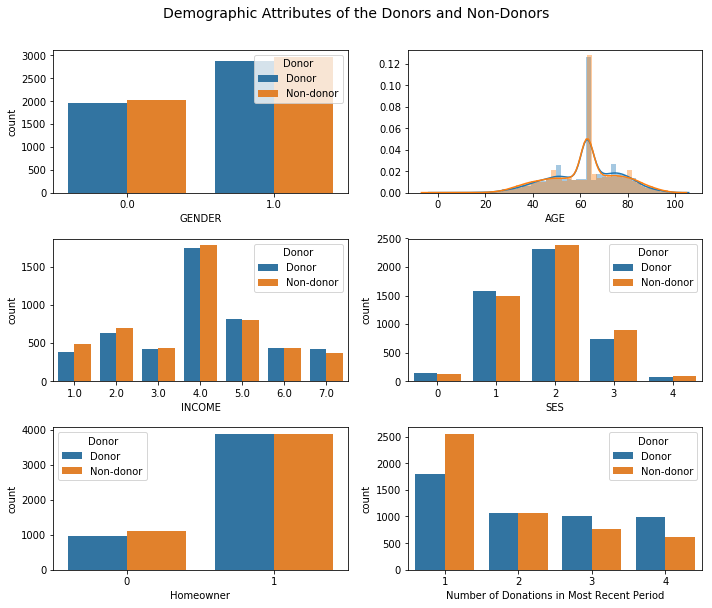

In [42]:
# Create plots
f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize = (10,8))

sns.countplot(data = df_dummy, x = 'GENDER', hue = 'Donor', ax = ax1)

sns.distplot(df_dummy.loc[df_dummy.TARGET_B == 1]['AGE'], ax = ax2)
sns.distplot(df_dummy.loc[df_dummy.TARGET_B == 0]['AGE'], ax = ax2)

sns.countplot(data = df_dummy, x = 'INCOME', hue = 'Donor', ax = ax3)

sns.countplot(data = df_dummy, x = 'SES', hue = 'Donor', ax = ax4)

sns.countplot(data = df_dummy, x = 'HOMEOWNR_H', hue = 'Donor', ax = ax5)
ax5.set_xlabel('Homeowner')

sns.countplot(data = df_dummy, x = 'RFA_2F', hue = 'Donor', ax = ax6)
ax6.set_xlabel('Number of Donations in Most Recent Period')

plt.suptitle('Demographic Attributes of the Donors and Non-Donors', y = 1.05, fontsize = 14)
f.tight_layout()
plt.show()

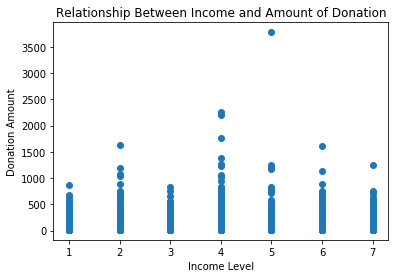

In [43]:
plt.scatter(x = df_dummy['INCOME'], y = df_dummy['RAMNTALL'])
plt.xlabel('Income Level')
plt.ylabel('Donation Amount')
plt.title('Relationship Between Income and Amount of Donation')
plt.show()

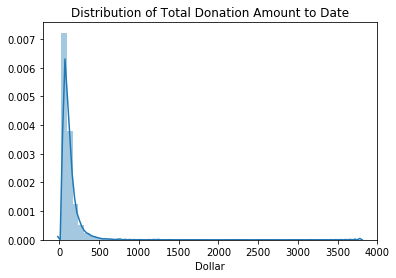

In [44]:
sns.distplot(df_dummy.RAMNTALL)
plt.title('Distribution of Total Donation Amount to Date')
plt.xlabel('Dollar')
plt.show()

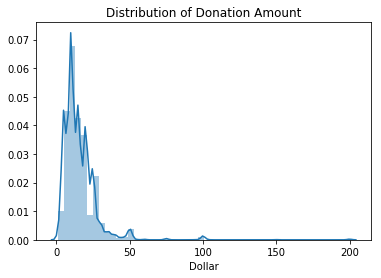

In [45]:
sns.distplot(df_dummy.loc[df_dummy.TARGET_B == 1].TARGET_D)
plt.title('Distribution of Donation Amount')
plt.xlabel('Dollar')
plt.show()

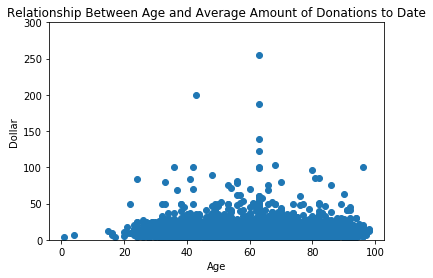

In [46]:
plt.scatter(x = df_dummy.AGE, y = df_dummy.AVGGIFT)
plt.title("Relationship Between Age and Average Amount of Donations to Date")
plt.xlabel('Age')
plt.ylabel('Dollar')
plt.ylim(0,300)
plt.show()

# Feature selection

In [47]:
# Assign X as a DataFrame of features, and y_donate as a Series of the outcome variable (whether donate or not), 
# and y_amount as a series of the outcome variable (amount of donation)
X = df_dummy.drop(['TARGET_B', 'TARGET_D', 'Donor'], axis = 1)
y_donate = df_dummy['TARGET_B']
y_amount = df_dummy['TARGET_D']
X.shape, y_donate.shape, y_amount.shape

((9843, 349), (9843,), (9843,))

In [48]:
# Standardize the data to prepare for variance threshold feature selection

minmax_scaler = MinMaxScaler()
minmax_scaler.fit(X)
X_scaled = pd.DataFrame(minmax_scaler.transform(X), columns = X.columns)
X_scaled.describe()

,CLUSTER,AGE,INCOME,GENDER,HIT,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,HPHONE_D,RFA_2F,CLUSTER2,SES,SINCE_ODATEDW,SINCE_MAXADATE,SINCE_MINRDATE,SINCE_MAXRDATE,SINCE_LASTDATE,SINCE_FISTDATE,SINCE_NEXTDATE,NOEXCH_0,NOEXCH_1,NOEXCH_X,HOMEOWNR_H,HOMEOWNR_U,RFA_2R_L,RFA_2A_D,RFA_2A_E,RFA_2A_F,RFA_2A_G,MDMAUD_R_C,MDMAUD_R_D,MDMAUD_R_I,MDMAUD_R_L,MDMAUD_R_X,MDMAUD_F_1,MDMAUD_F_2,MDMAUD_F_X,MDMAUD_A_C,MDMAUD_A_L,MDMAUD_A_X,GEOCODE2_A,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,URBAN_C,URBAN_R,URBAN_S,URBAN_T,URBAN_U
count,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,98

In [49]:
# Split data into train and test sets
# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_donate, train_size=0.70, random_state=123)
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y_donate, train_size=0.70, random_state=123)

print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print (X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape)

(6890, 349) (2953, 349) (6890,) (2953,)
(6890, 349) (2953, 349) (6890,) (2953,)


C:\Users\TLe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


### Feature Selection Using Variance THreshold

In [50]:
# Remove all features whose variance are less than 0.05
var_selector = VarianceThreshold(threshold = 0.05)
var_selector.fit(X_train_scaled)
indices_selected = var_selector.get_support(indices=True)
colnames_vtselected = [X_train_scaled.columns[i] for i in indices_selected]
print(colnames_vtselected)
len(colnames_vtselected)

['CLUSTER', 'INCOME', 'GENDER', 'DATASRCE', 'POP90C1', 'POP90C2', 'POP90C3', 'DW1', 'DW2', 'DW4', 'DW5', 'HVP1', 'HVP2', 'HVP3', 'HVP4', 'HVP5', 'RP1', 'RP2', 'RP3', 'RP4', 'LFC8', 'LFC9', 'HC2', 'HC5', 'HC6', 'HC7', 'HC8', 'HC11', 'HC13', 'HC17', 'HC18', 'HC19', 'HPHONE_D', 'RFA_2F', 'CLUSTER2', 'SINCE_ODATEDW', 'SINCE_MINRDATE', 'HOMEOWNR_H', 'HOMEOWNR_U', 'RFA_2A_D', 'RFA_2A_E', 'RFA_2A_F', 'RFA_2A_G', 'GEOCODE2_A', 'GEOCODE2_B', 'GEOCODE2_C', 'GEOCODE2_D', 'URBAN_C', 'URBAN_R', 'URBAN_S', 'URBAN_T', 'URBAN_U']


52

### Further Feature Selection using RFECV

In [51]:
# Specify the model
estimator = LogisticRegression()    # estimator for RFE, select the suitable model 

# Select variables using RFECV
rfe_selector = RFE(estimator, step=1)
rfe_selector.fit(X_train[colnames_vtselected], y_train)


RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
  n_features_to_select=None, step=1, verbose=0)

In [52]:
# Show the variables selected by RFECV
rfe_selected = list(zip(rfe_selector.ranking_, rfe_selector.support_, colnames_vtselected))
rfe_selected = pd.DataFrame(rfe_selected, columns = ['Ranking', 'Support', 'Feature'])
rfe_selected.head()

,Ranking,Support,Feature
0,26,False,CLUSTER
1,1,True,INCOME
2,1,True,GENDER
3,1,True,DATASRCE
4,22,False,POP90C1


In [53]:
rfe_selected_var = list(rfe_selected[rfe_selected.Ranking == 1]['Feature'])
print(rfe_selected_var)

['INCOME', 'GENDER', 'DATASRCE', 'DW1', 'DW2', 'HVP1', 'HVP5', 'RP1', 'HC7', 'HC8', 'HPHONE_D', 'RFA_2F', 'HOMEOWNR_H', 'HOMEOWNR_U', 'RFA_2A_D', 'RFA_2A_F', 'RFA_2A_G', 'GEOCODE2_A', 'GEOCODE2_B', 'GEOCODE2_C', 'GEOCODE2_D', 'URBAN_C', 'URBAN_R', 'URBAN_S', 'URBAN_T', 'URBAN_U']


In [54]:
len(rfe_selected_var)

26

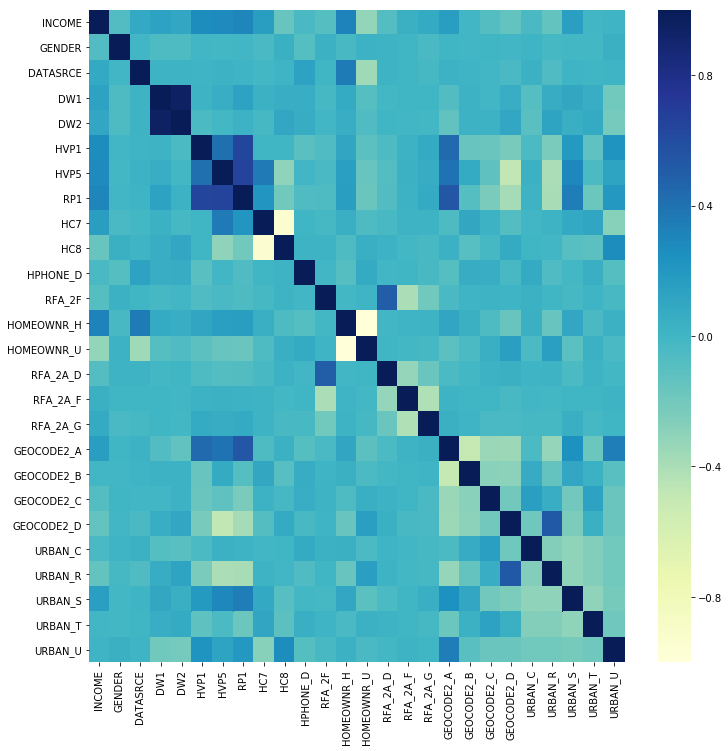

In [55]:
# Check correlation of the selected variables
plt.figure(figsize = (12, 12))
sns.heatmap(X[rfe_selected_var].corr(), cmap="YlGnBu")
plt.show()

### Define Some Functions for modeling

In [56]:
def cv_optimize(clf, parameters, X, y, n_jobs=1, n_folds=5, score_func=None):
    if score_func:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, n_jobs=n_jobs, scoring=score_func)
    else:
        gs = GridSearchCV(clf, param_grid=parameters, n_jobs=n_jobs, cv=n_folds)
    gs.fit(X, y)
    print ("Best parameters:", gs.best_params_)
    best = gs.best_estimator_
    return best


In [57]:
def do_classify(clf, parameters, Xtrain, ytrain, Xtest, ytest, score_func=None, n_folds=5, n_jobs=1):
   
    if parameters:
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_jobs=n_jobs, n_folds=n_folds, score_func=score_func)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
   # print (############# based on standard predict ################")
    print ("Accuracy on training data: %0.2f" % (training_accuracy))
    print ("Accuracy on test data:     %0.2f" % (test_accuracy))
    print (confusion_matrix(ytest, clf.predict(Xtest)))
    print (classification_report(ytest, clf.predict(Xtest)))
    print ("########################################################")
    return clf

In [58]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])


def points_plot(ax, Xtr, Xte, ytr, yte, clf, mesh=True, colorscale=cmap_light, cdiscrete=cmap_bold, alpha=0.3, psize=10, zfunc=False):
    h = .02
    X=np.concatenate((Xtr, Xte))
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    #plt.figure(figsize=(10,6))
    if mesh:
        if zfunc:
            p0 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 0]
            p1 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
            Z=zfunc(p0, p1)
        else:
            Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light, alpha=alpha, axes=ax)
    ax.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr-1, cmap=cmap_bold, s=psize, alpha=alpha,edgecolor="k")
    # and testing points
    yact=clf.predict(Xte)
    ax.scatter(Xte[:, 0], Xte[:, 1], c=yte-1, cmap=cmap_bold, alpha=alpha, marker="s", s=psize+10)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    return ax,xx,yy

In [59]:
# Make ROC curve
def make_roc(name, clf, ytest, xtest, ax=None, labe=5, proba=True, skip=0):
    initial=False
    if not ax:
        ax=plt.gca()
        initial=True
    if proba:
        fpr, tpr, thresholds=roc_curve(ytest, clf.predict_proba(xtest)[:,1])
    else:
        fpr, tpr, thresholds=roc_curve(ytest, clf.decision_function(xtest))
    roc_auc = auc(fpr, tpr)
    if skip:
        l=fpr.shape[0]
        ax.plot(fpr[0:l:skip], tpr[0:l:skip], '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    else:
        ax.plot(fpr, tpr, '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    label_kwargs = {}
    label_kwargs['bbox'] = dict(
        boxstyle='round,pad=0.3', alpha=0.2,
    )
    for k in range(0, fpr.shape[0],labe):
        #from https://gist.github.com/podshumok/c1d1c9394335d86255b8
        threshold = str(np.round(thresholds[k], 2))
        ax.annotate(threshold, (fpr[k], tpr[k]), **label_kwargs)
    if initial:
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title('ROC')
    ax.legend(loc="lower right")
    return ax

## Model Selection
### Logistic Regression

In [60]:
clflog = LogisticRegression()
parameters = {"C": [0.0001, 0.001, 0.1, 1, 10, 100]}
clflog = do_classify(clflog, parameters, X_train[rfe_selected_var], y_train, X_test[rfe_selected_var], y_test, 
                                            n_jobs = 4, score_func = 'f1')

Best parameters: {'C': 100}
Accuracy on training data: 0.59
Accuracy on test data:     0.58
[[999 509]
 [746 699]]
             precision    recall  f1-score   support

          0       0.57      0.66      0.61      1508
          1       0.58      0.48      0.53      1445

avg / total       0.58      0.58      0.57      2953

########################################################


In [61]:
#ax=make_roc("gnb",clfgnb, ytest, Xtest, None, labe=60)
ax = make_roc("Logistic",clflog, y_test, X_test[rfe_selected_var], ax, labe=1)


NameError: name 'ax' is not defined

### Decision Tree

In [62]:
clftree = tree.DecisionTreeClassifier()

parameters = {"max_depth": [1, 2, 3, 4, 5, 6, 7], 'min_samples_leaf': [1, 2, 3, 4, 5, 6]}
clftree = do_classify(clftree, parameters, X_train[rfe_selected_var], y_train, X_test[rfe_selected_var], y_test, 
                                            n_jobs = 4, score_func = 'f1')

Best parameters: {'max_depth': 5, 'min_samples_leaf': 6}
Accuracy on training data: 0.60
Accuracy on test data:     0.57
[[954 554]
 [719 726]]
             precision    recall  f1-score   support

          0       0.57      0.63      0.60      1508
          1       0.57      0.50      0.53      1445

avg / total       0.57      0.57      0.57      2953

########################################################


In [63]:
# Visualize Decision Tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz


In [65]:
# Visualize decision tree online 
with open('tree_classifier.txt', 'w') as f:
    f = tree.export_graphviz(clftree, out_file = f)
    
# Visualize as pdf
with open("tree_classifier.dot", "w") as f:
    f = tree.export_graphviz(clftree, out_file=f)

In [675]:
# Try pydotplus at home
import pydotplus

ModuleNotFoundError: No module named 'pydotplus'

In [67]:
# Visualize data
#feature_names = rfe_selected_var
import collections
data = tree.export_graphviz(clftree,
                                feature_names=rfe_selected_var,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(data)
 
colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)
 
for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))
 
for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])
 
graph.write_png('tree.png')

InvocationException: GraphViz's executables not found

### Random Forest

In [651]:
clfForest = RandomForestClassifier()

parameters = {"n_estimators": range(1, 20)}
clfForest = do_classify(clfForest, parameters, X_train[rfe_selected_var], y_train, X_test[rfe_selected_var], y_test,
                                                             n_jobs = 4, score_func='f1')


Best parameters: {'n_estimators': 13}
Accuracy on training data: 0.99
Accuracy on test data:     0.52
[[822 686]
 [720 725]]
             precision    recall  f1-score   support

          0       0.53      0.55      0.54      1508
          1       0.51      0.50      0.51      1445

avg / total       0.52      0.52      0.52      2953

########################################################


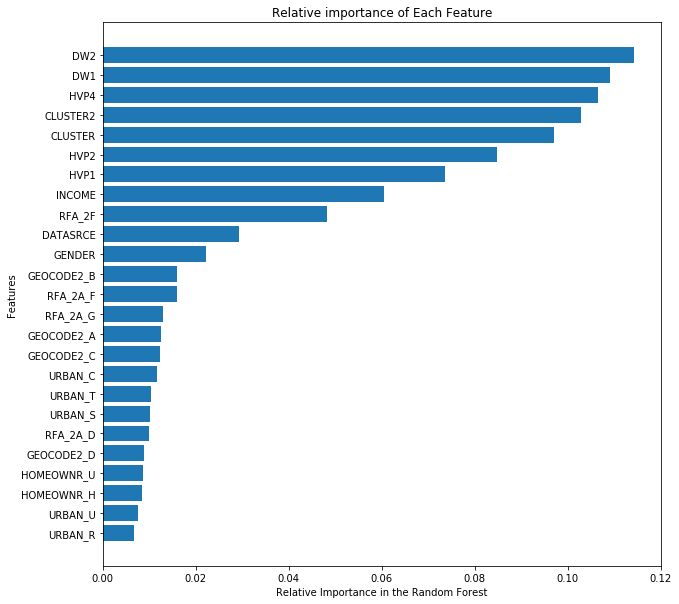

In [652]:
importance_list = clfForest.feature_importances_
name_list = rfe_selected_var
importance_list, name_list = zip(*sorted(zip(importance_list, name_list)))

plt.figure(figsize = (10, 10))
plt.barh(range(len(name_list)),importance_list,align='center')
plt.yticks(range(len(name_list)),name_list)
plt.xlabel('Relative Importance in the Random Forest')
plt.ylabel('Features')
plt.title('Relative importance of Each Feature')
plt.show()

### Naive Bayes

In [653]:
clfnb=GaussianNB()
clfnb.fit(X_train, y_train)
print (confusion_matrix(y_test, clfnb.predict(X_test)))
print (classification_report(y_test, clfnb.predict(X_test)))

[[664 844]
 [479 966]]
             precision    recall  f1-score   support

          0       0.58      0.44      0.50      1508
          1       0.53      0.67      0.59      1445

avg / total       0.56      0.55      0.55      2953



## Feature Reduction Using PCA

In [500]:
# Perform PCA on the features previously selected by Variance Threshold

pca = PCA()
pca.fit(X_scaled)
pca_table = pd.DataFrame({'Variance Explained': pca.explained_variance_ratio_, 'PCA #': 
                          np.arange(1, len(pca.explained_variance_ratio_) + 1)})
pca_table.head()

,PCA #,Variance Explained
0,1,0.175228
1,2,0.091170
2,3,0.052407
3,4,0.048713
4,5,0.041813


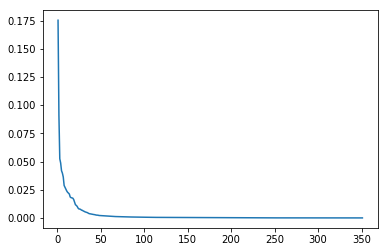

In [395]:
# Scree plot
plt.plot(pca_table['PCA #'], pca_table['Variance Explained'])
#plt.xlim(0,50)
plt.show()

In [501]:
pca_table['Variance Explained'].head(30).sum()

0.8431227812246987

In [502]:
# With 30 principal components, we can expalin 84% of the variation in the data.
# Apply PCA with 30 components:
pca30 = PCA(n_components=30)
#pca10.fit(X_dummy[colnames_vtselected])

pca_columns = []
for i in range(1,31):
    col = 'pca'+str(i)
    pca_columns.append(col)

X_pca = pca30.fit_transform(X_scaled)
X_pca = pd.DataFrame(X_pca, columns = pca_columns)
X_pca.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25,pca26,pca27,pca28,pca29,pca30
0,1.499040,-0.533668,-0.187531,-0.485106,0.661544,-0.282193,0.063993,0.024321,0.065168,-0.017256,-0.379329,0.996541,0.770191,0.296963,0.226273,-0.096698,0.891887,0.553472,-0.376644,0.160906,-0.057948,0.160146,0.364570,-0.271799,0.020571,0.068160,-0.008578,-0.007512,0.203278,-0.069364
1,1.393677,-1.678025,0.036103,-0.717345,0.227346,-0.649148,-0.108120,-0.960862,0.701313,-0.206885,-0.247253,-0.046644,0.005614,-0.042640,-0.292691,-0.131933,1.024107,0.047941,-0.202859,0.479145,0.046125,-0.292827,0.306322,0.094718,-0.218834,-0.085971,0.247836,0.123399,0.555249,0.504002
2,0.802820,-0.566912,0.099074,-0.281989,1.169750,0.729135,0.136235,-0.267984,0.106982,0.395972,-0.400173,0.397441,-0.559901,0.340159,0.874801,0.505516,0.938474,0.607887,0.050594,-0.215020,0.122809,0.007454,0.535507,0.557139,-0.043834,0.035265,-0.392045,0.265795,0.000161,0.089309
3,2.418778,-0.180385,-0.289070,1.175465,-0.145589,0.255607,-0.042090,0.093535,-0.608685,0.371306,0.396401,0.160465,0.327413,-0.402144,0.195965,0.438239,0.039962,0.102440,0.713463,0.011464,0.213436,-0.381137,-0.011464,-0.154210,0.066839,-0.424950,0.245952,-0.050385,0.103256,-0.387572
4,0.736756,-0.199512,-1.135119,-0.817866,0.075306,-1.114712,0.274985,0.038938,0.469997,-0.890355,-0.729444,0.165010,0.374641,-0.169857,-0.280534,-0.085129,-0.124608,-0.559699,0.073155,-0.317052,0.099611,-0.374456,-0.012238,0.005169,0.479716,0.957728,-0.079690,-0.584752,0.709700,-0.607643


In [503]:
X_pca_train, X_pca_test, y_train, y_test = train_test_split(X_pca, y_donate, train_size=0.70, random_state=123)
print (X_pca_train.shape, X_pca_test.shape, y_train.shape, y_test.shape)

(6890, 30) (2953, 30) (6890,) (2953,)


C:\Users\TLe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


### Random Forest using pca dataset

In [504]:
clfForest_pca = RandomForestClassifier()

parameters = {"n_estimators": range(1, 20)}
clfForest_pca = do_classify(clfForest_pca, parameters, X_pca_train, y_train, X_pca_test, y_test,
                                                             n_jobs = 4, score_func='recall')


C:\Users\TLe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


BEST {'n_estimators': 11} 0.528842492708 [mean: 0.50853, std: 0.02413, params: {'n_estimators': 1}, mean: 0.26398, std: 0.02451, params: {'n_estimators': 2}, mean: 0.51295, std: 0.01082, params: {'n_estimators': 3}, mean: 0.34079, std: 0.02754, params: {'n_estimators': 4}, mean: 0.51884, std: 0.01525, params: {'n_estimators': 5}, mean: 0.36845, std: 0.02285, params: {'n_estimators': 6}, mean: 0.49823, std: 0.01905, params: {'n_estimators': 7}, mean: 0.39023, std: 0.03285, params: {'n_estimators': 8}, mean: 0.51325, std: 0.01266, params: {'n_estimators': 9}, mean: 0.40142, std: 0.01888, params: {'n_estimators': 10}, mean: 0.52884, std: 0.02058, params: {'n_estimators': 11}, mean: 0.43761, std: 0.02076, params: {'n_estimators': 12}, mean: 0.52707, std: 0.01506, params: {'n_estimators': 13}, mean: 0.43467, std: 0.00771, params: {'n_estimators': 14}, mean: 0.50765, std: 0.01862, params: {'n_estimators': 15}, mean: 0.42996, std: 0.02041, params: {'n_estimators': 16}, mean: 0.50030, std: 0.0

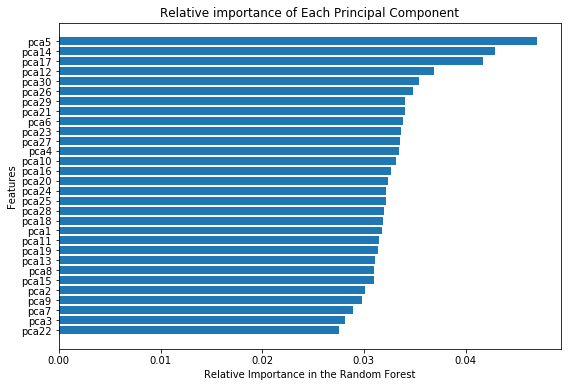

In [505]:
importance_list = clfForest_pca.feature_importances_
name_list = pca_columns
importance_list, name_list = zip(*sorted(zip(importance_list, name_list)))

plt.figure(figsize = (9, 6))
plt.barh(range(len(name_list)),importance_list,align='center')
plt.yticks(range(len(name_list)),name_list)
plt.xlabel('Relative Importance in the Random Forest')
plt.ylabel('Features')
plt.title('Relative importance of Each Principal Component')

plt.show()

## Predict Donation Amount 

In [623]:
# Get the predicted classes for the test sample from the Logistic Model
predicted = clflog.predict(X_test[rfe_selected_var])
predicted = pd.DataFrame(predicted)
predicted.columns = ['Predicted Donor']
predicted['Predicted Donor'] = predicted['Predicted Donor'].fillna(0)
predicted['Predicted Donor'].value_counts()

0    1754
1    1199
Name: Predicted Donor, dtype: int64

In [624]:
# Reset index in X_test and predicted, then concatenate them
X_test = X_test.reset_index(drop = True)
predicted = predicted.reset_index(drop = True)
X_donor = pd.concat([X_test, predicted], axis = 1)
X_donor.shape

(2953, 352)

In [625]:
X_donor.head()

,CLUSTER,AGE,INCOME,GENDER,HIT,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,HPHONE_D,RFA_2F,CLUSTER2,SES,SINCE_ODATEDW,SINCE_MAXADATE,SINCE_MINRDATE,SINCE_MAXRDATE,SINCE_LASTDATE,SINCE_FISTDATE,SINCE_NEXTDATE,NOEXCH_0,NOEXCH_1,NOEXCH_X,HOMEOWNR_H,HOMEOWNR_U,RFA_2R_L,RFA_2A_D,RFA_2A_E,RFA_2A_F,RFA_2A_G,MDMAUD_R_C,MDMAUD_R_D,MDMAUD_R_I,MDMAUD_R_L,MDMAUD_R_X,MDMAUD_F_1,MDMAUD_F_2,MDMAUD_F_5,MDMAUD_F_X,MDMAUD_A_C,MDMAUD_A_L,MDMAUD_A_T,MDMAUD_A_X,GEOCODE2_A,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,URBAN_C,URBAN_R,URBAN_S,URBAN_T,URBAN_U,Predicted Donor
0,3.0,96.0,7.0,0.0,0,2.0,1,24,29,32,7,1,2,926,222,414,99,0,0,48,52,91,1,0,5,8,0,2,2,1,1,0,0,6,0,0,2,33,37,39,35,42,44,19,48,34,18,11,31,25,12,8,7,6,22,20,31,14,13,17,6,17,36,33,31,19,5,1,48,16,5,32,143,221,65,60,5,33,29,19,0,0,0,4272,4266,7,8,56,44,94,6,4,23,54,43,19,69,31,4,1,3,23,29,11,14,63,14,0,1,0,95,96,98,98,99,84,12,30,48,46,12,5,22,11,0,17,13,13,0,91,96,97,97,452,647,577,727,28084,10,9,15,22,18,11,4,3,7,3,0,18,17,25,14,4,6,12,11,2,57,4,55,45,10,84,8,0,0,0,0,0,4,4,0,3,18,25,5,64,83,90,76,85,76,67,35,94,0,2,24,22,3,14,16,1,2,8,1,4,1,3,0,0,1,1,12,8,2,9,14,9,10,4,1,9,11,6,4,7,1,1,9,74,8,0,145,2,4,16,24,13,29,12,3,15,1,9,8,0,0,0,10,22,0,30,13,30,26,1,5,2,8,0,0,8,3,0,0,0,0,2,1,0,7,42,87,6,3,3,91,49,15,5,37,2,2,7,14,37,63,6,0,73,0,22,0,0,0,99,0,97,99,99,17,2,5,2,34,71,6,13,98.0,23,12,2.0,9.0,6.0,3.0,4.260870,0,4,3.0,1,150,17,125,43,28,142,139.0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,1
1,18.0,61.0,4.0,0.0,7,3.0,3,40,47,13,6,2,6,4383,1141,1394,99,0,0,50,50,90,1,1,4,10,0,1,0,2,0,0,0,8,1,0,2,28,36,39,28,38,41,32,39,39,21,16,29,29,15,7,3,1,16,16,33,20,15,7,1,4,12,24,64,38,16,6,57,14,3,26,254,314,72,52,0,27,26,21,0,0,0,1464,1367,6,6,74,26,98,2,3,55,82,63,41,88,12,14,3,11,12,11,6,25,61,4,0,1,0,2,47,76,88,99,0,3,47,53,54,18,6,20,7,0,14,2,10,0,81,95,97,99,407,423,449,464,13637,8,13,16,27,24,10,2,0,1,6,12,15,30,26,9,2,0,1,10,5,35,5,61,39,11,81,10,3,2,0,0,2,2,3,1,1,30,30,4,77,78,88,68,82,65,66,49,88,99,4,8,11,7,12,23,1,3,8,1,16,4,4,4,1,0,11,18,4,2,4,17,7,6,2,3,8,6,6,5,6,2,6,6,74,5,0,128,1,11,32,34,12,8,3,3,30,2,25,6,1,3,0,22,40,3,47,12,13,25,0,4,0,7,0,0,5,2,0,1,1,0,1,0,0,4,52,92,5,2,1,98,76,33,4,16,0,17,20,80,97,3,27,10,59,0,39,1,0,0,99,0,99,99,99,10,2,2,4,8,19,6,13,19.0,3,2,4.0,10.0,10.0,1.0,6.333333,1,3,20.0,2,30,17,32,29,29,33,32.0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,

In [627]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_donor[rfe_selected_var], 
                                                        X_donor['Predicted Donor'],
                                                       test_size = 0.3, random_state = 123)

print(X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape)

(2067, 25) (886, 25) (2067,) (886,)


In [654]:
def do_regress(estimator, Xtrain, ytrain, Xtest, ytest, parameters = None, score_func=None, n_folds=5, n_jobs=1):  
    if parameters:
        estimator = cv_optimize(estimator, parameters, Xtrain, ytrain, n_jobs=n_jobs, n_folds=n_folds, score_func=score_func)
    estimator=estimator.fit(Xtrain, ytrain)
    cv_results = cross_val_score(estimator, Xtrain, ytrain, cv = 5)
    ypred = estimator.predict(Xtest)
 
    print ("Cross-validation score (R-squared) on training data: %0.2f" % (np.mean(cv_results)))
    print ("R-squared on test data: %0.2f" % (estimator.score(Xtest,  ytest)))
    print ('Mean Squared Error: %0.2f' %(np.sqrt(mean_squared_error(ytest, ypred))))
    return estimator

### Linear Regression Model

In [614]:
# lm = LinearRegression()
# cv_results = cross_val_score(lm, X_train1, y_train1, cv = 5)
# lm = lm.fit(X_train1, y_train1)
# y_pred = lm.predict(X_test1)
# print ('Cross Validation Score on the Training Set: {}'.format(np.mean(cv_results)))
# print ('R-squared on the Test Set: {}'.format(lm.score(X_test1, y_test1)))
# print ('Root Mean Squared Error: {}'.format(np.sqrt(mean_squared_error(y_test1, y_pred))))

In [655]:
lm = LinearRegression()
do_regress(lm, X_train1, y_train1, X_test1, y_test1)

Cross-validation score (R-squared) on training data: 0.72
R-squared on test data: 0.72
Mean Squared Error: 0.26


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [662]:
print (lm.predict(X_test1).sum()), print (y_test1.sum())

361.08435477
365


(None, None)

In [674]:
coef = lm.coef_
result_tbl = list(zip(rfe_selected_var, coef))
result_tbl = pd.DataFrame(result_tbl, columns = ['Feature', 'Coefficient'])
result_tbl

,Feature,Coefficient
0,CLUSTER,-0.004237
1,INCOME,0.022649
2,GENDER,0.037325
3,DATASRCE,-0.023264
4,DW1,-0.001233
5,DW2,0.001749
6,HVP1,0.006273
7,HVP2,-0.003923
8,HVP4,0.002466
9,RFA_2F,0.297043


### Ridge Regression

In [664]:
ridge = Ridge()
param = {'alpha': [0.5, 0.2, 0.1, 0.01, 0.001, 0.0001]}
do_regress(ridge, X_train1, y_train1, X_test1, y_test1, parameters=param)

Best parameters: {'alpha': 0.5}
Cross-validation score (R-squared) on training data: 0.72
R-squared on test data: 0.72
Mean Squared Error: 0.26


Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [670]:
ridge = ridge.fit(X_train1, y_train1)
print (ridge.predict(X_test1).sum()), print (y_test1.sum())

361.009801168
365


(None, None)

### Lasso Regression

In [667]:
lasso = Lasso()
param = {'alpha': [0.5, 0.2, 0.1, 0.01, 0.001, 0.0001]}
do_regress(lasso, X_train1, y_train1, X_test1, y_test1, parameters=param)

Best parameters: {'alpha': 0.0001}
Cross-validation score (R-squared) on training data: 0.72
R-squared on test data: 0.72
Mean Squared Error: 0.26


Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [671]:
lasso = lasso.fit(X_train1, y_train1)
print (lasso.predict(X_test1).sum()), print (y_test1.sum())

355.707304149
365


(None, None)

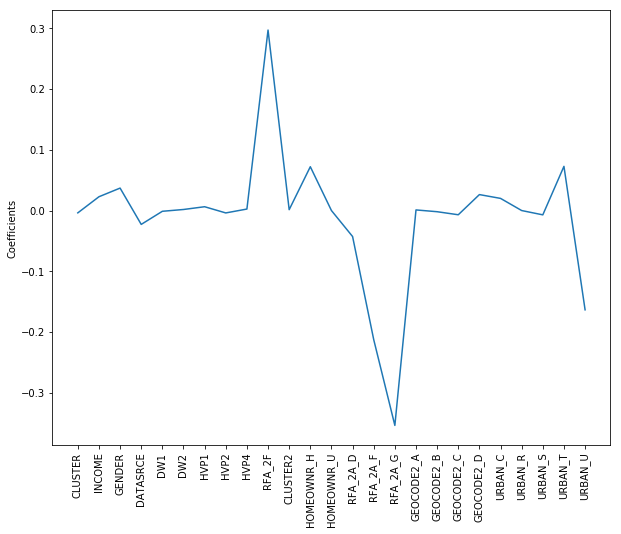

In [658]:
names = X_train1.columns
lasso = Lasso(alpha = 0.0001)
lasso_coef = lasso.fit(X_train1, y_train1).coef_
plt.figure(figsize=(10,8))
_ = plt.plot(range(len(names)), lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation = 90)
_ = plt.ylabel('Coefficients')
plt.show()

### Elastic Net

In [659]:
l1_space = np.linspace(0, 1, 10)
param = {'l1_ratio': l1_space}
elastic = ElasticNet()
do_regress(elastic, X_train1, y_train1, X_test1, y_test1, parameters=param)

C:\Users\TLe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\TLe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\TLe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\TLe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_

Best parameters: {'l1_ratio': 0.0}
Cross-validation score (R-squared) on training data: 0.56
R-squared on test data: 0.56
Mean Squared Error: 0.33


C:\Users\TLe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\TLe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\TLe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\TLe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.0,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [672]:
elastic = elastic.fit(X_train1, y_train1)
print (elastic.predict(X_test1).sum()), print (y_test1.sum())

355.279035457
365


(None, None)

# Exploratory Data Analysis
## Charts Describing Demographic Features of the Donors

In [241]:
# Find number of missing values
print ('Number of missing records for AGE: {:0.0f}'.format(donate_all.AGE.isnull().sum()))
print ('Number of missing records for GENDER: {:0.0f}'.format(donate_all.GENDER.isnull().sum()))
print ('Number of missing records for DOMAIN: {:0.0f}'.format(donate_all.DOMAIN.isnull().sum()))
print ('Number of missing records for INCOME: {:0.0f}'.format(donate_all.INCOME.isnull().sum()))

Number of missing records for AGE: 23665
Number of missing records for GENDER: 0
Number of missing records for DOMAIN: 0
Number of missing records for INCOME: 21286


In [254]:
# Clean GENDER column
donate_all.GENDER = np.where((donate_all.GENDER == 'F') | (donate_all.GENDER == 'M'),   donate_all.GENDER, 'Others')
donate_all.GENDER.value_counts()

F         51277
M         39094
Others     5041
Name: GENDER, dtype: int64

In [255]:
# Create Socio-Economic Status column
donate_all['SES'] = donate_all.DOMAIN.str[1]
donate_all['SES'].value_counts()

2    46040
1    28498
3    16754
4     1804
Name: SES, dtype: int64

In [248]:
#donate_all.SES.isnull().sum()

2316

In [251]:
# Recode values of Socio-Econ status
def ses_recode(ses):
    
    if ses == 1:
        return 'High'
    elif ses == 2:
        return 'Average'
    elif (ses == 3) or (ses == 4):
        return 'Low'
    else: 
        return np.NaN
    
# Find Socio-econ status
donate_all['SES'] = donate_all['SES'].notnull().apply(ses_recode)
donate_all['SES'].value_counts()

Series([], Name: SES, dtype: int64)

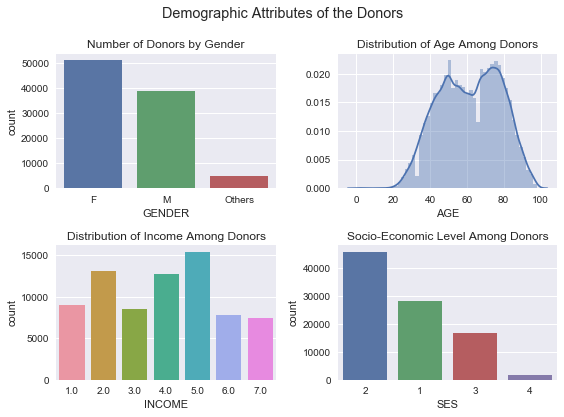

In [258]:
# Create plots
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

sns.countplot(data = donate_all, x = 'GENDER', ax = ax1)
ax1.set_title('Number of Donors by Gender')

sns.distplot(donate_all['AGE'].dropna(), ax = ax2)
ax2.set_title('Distribution of Age Among Donors')

sns.countplot(data = donate_all, x = 'INCOME', ax = ax3)
ax3.set_title('Distribution of Income Among Donors')

sns.countplot(data = donate_all, x = donate_all['SES'], ax = ax4)
ax4.set_title('Socio-Economic Level Among Donors')


plt.suptitle('Demographic Attributes of the Donors', y = 1.05)
f.tight_layout()
plt.show()

From the above charts we can see:
    - About 60% of donors are female. 40% are male.
    - Donors's age ranges from <20 to >100, with highest number of donors around 50 and 80 years old.
    - Household income ranges from 1 to 7, with about 20% of donors have income of 2, 4, and 5.
    - About half of the donors have average socio-economic status (SES = 2)

In [266]:
donate_all[['RAMNTALL', 'NGIFTALL', 'AVGGIFT', 'TARGET_B', 'TARGET_D', 'AGE', 'INCOME']].describe()

,RAMNTALL,NGIFTALL,AVGGIFT,TARGET_B,TARGET_D,AGE,INCOME
count,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,71747.000000,74126.000000
mean,104.489351,9.602031,13.347786,0.050759,0.793073,61.611649,3.886248
std,118.580367,8.554342,10.769997,0.219506,4.429725,16.664199,1.854960
min,13.000000,1.000000,1.285714,0.000000,0.000000,1.000000,1.000000
25%,40.000000,3.000000,8.384615,0.000000,0.000000,48.000000,2.000000
50%,78.000000,7.000000,11.636364,0.000000,0.000000,62.000000,4.000000
75%,131.000000,13.000000,15.477955,0.000000,0.000000,75.000000,5.000000
max,9485.000000,237.000000,1000.000000,1.000000,200.000000,98.000000,7.000000


Only 5% of donors responded to the 97NK promotion.

Number of lifetime gifts to date range from 1 to 237, with the mean of 10.

Total amount of gifts to date ranges from \$13 to \$9458, with a mean of $104

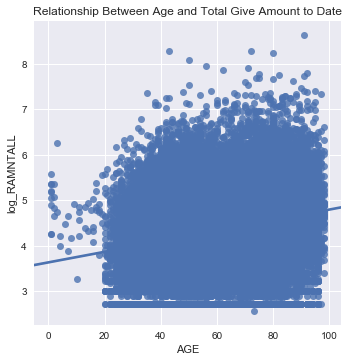

In [341]:
# Correlate total giving with age, income, etc...

donate_all['log_AGE'] = np.log(donate_all.AGE)
donate_all['log_RAMNTALL'] = np.log(donate_all.RAMNTALL)
sns.lmplot('AGE', 'log_RAMNTALL', data = donate_all, fit_reg = True, ci = 95)
plt.title('Relationship Between Age and Total Give Amount to Date')
plt.show()

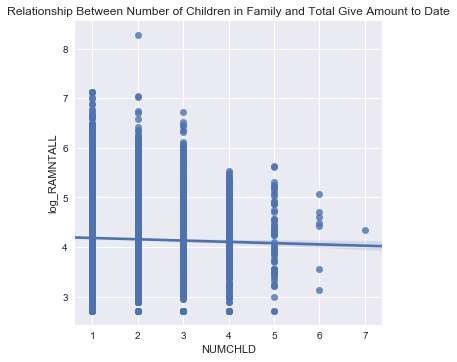

In [312]:

sns.lmplot('NUMCHLD', 'log_RAMNTALL', data = donate_all, fit_reg = True, ci = 95)
plt.title('Relationship Between Number of Children in Family and Total Give Amount to Date')
plt.show()

In [314]:
donate_all.loc[:,'RAMNT_3':'RAMNT_24'].describe()

,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,...,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24
count,242.000000,281.000000,9.000000,776.00000,8895.000000,21472.000000,16734.000000,10461.000000,14740.000000,25700.000000,...,7262.000000,26994.000000,9401.000000,19778.000000,15877.000000,7888.000000,9513.000000,20873.000000,7859.000000,17738.000000
mean,12.221074,14.540107,17.000000,14.35692,15.088435,15.673702,15.101013,15.415070,14.562430,14.859901,...,13.347521,14.032142,12.754589,12.283269,13.116019,14.262132,12.942051,12.266252,12.149945,11.364891
std,9.153015,14.548098,14.908052,10.06335,11.032013,12.153908,13.020388,12.356341,10.703185,10.848680,...,11.043516,10.948453,10.979879,11.787762,12.847063,10.161455,10.692959,9.179317,9.342705,8.708032
min,2.000000,1.000000,4.000000,1.00000,1.000000,1.000000,1.000000,0.300000,1.000000,1.000000,...,1.000000,0.500000,1.000000,1.000000,1.000000,0.500000,1.000000,0.290000,0.300000,1.000000
25%,6.000000,7.000000,8.000000,9.00000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,...,7.000000,8.000000,6.000000,6.000000,8.000000,9.000000,7.000000,7.000000,6.000000,5.000000
50%,10.000000,10.000000,12.000000,12.00000,15.000000,15.000000,14.000000,14.000000,12.000000,13.000000,...,10.000000,12.000000,10.000000,10.000000,10.000000,12.000000,10.000000,10.000000,10.000000,10.000000
75%,15.000000,15.000000,20.000000,19.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,...,16.000000,17.000000,15.000000,15.000000,15.000000,18.000000,15.000000,15.000000,15.000000,15.000000
max,50.000000,100.000000,50.000000,100.00000,250.000000,500.000000,1000.000000,500.000000,300.000000,300.000000,...,300.000000,500.000000,500.000000,1000.000000,970.000000,250.000000,300.000000,300.000000,200.000000,225.000000


In [348]:
# Calculate the share of donors who responded to each promotion in the dataset, as well as the total give amount.
prom_code = ['96NK', '96TK', '96SK', '96LL', '96G1', '96GK', '96CC', '96WL', '96X1', '96XK',  '95FS', '95NK', '95TK',
            '95LL', '95G1','95GK', '95CC', '95WL', '95X1', '95XK', '94FS', '94NK']

col_list = list(donate_all.loc[:,'RAMNT_3':'RAMNT_24'])

percent_give = []
total_give = []
for col in col_list:
    percent = donate_all[col].notnull().sum()*100/len(donate_all[col])
    percent_give.append(percent)
    give = donate_all[col].sum()
    total_give.append(give)   
    
df1 = pd.DataFrame({'Percent of Donors Who Gave': percent_give, 'Total Give Amount': total_give}, index = prom_code)
df1

,Percent of Donors Who Gave,Total Give Amount
96NK,0.253637,2957.50
96TK,0.294512,4085.77
96SK,0.009433,153.00
96LL,0.813315,11140.97
96G1,9.322727,134211.63
96GK,22.504507,336545.72
96CC,17.538674,252700.35
96WL,10.964030,161257.05
96X1,15.448791,214650.22
96XK,26.935815,381899.45


Percent of donors who responded to 96NK, 96TK, 96SK, and 96LL are very low compared to those who responded to previous promotions.

In [350]:
# Percent population who is certain nationality/urban and rural areas
donate_all.loc[:,'POP90C1':'ETH16'].describe()

,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,...,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16
count,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,...,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000
mean,58.589653,13.622479,26.140527,48.211724,50.951390,84.854505,7.467405,0.776904,2.905704,7.458077,...,0.397350,0.612806,0.561491,0.250587,0.210309,0.068388,5.138169,0.302478,0.327433,1.513615
std,47.430774,31.222078,40.037855,5.565579,5.768361,21.013875,16.690771,3.469319,7.069759,13.786061,...,2.232166,2.533743,2.309205,1.003530,1.054121,1.169671,11.333534,1.292820,3.208650,3.365285
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,47.000000,50.000000,82.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,99.000000,0.000000,0.000000,49.000000,51.000000,93.000000,1.000000,0.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,99.000000,0.000000,52.000000,50.000000,53.000000,98.000000,6.000000,1.000000,3.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,2.000000
max,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,...,72.000000,99.000000,67.000000,46.000000,47.000000,72.000000,97.000000,57.000000,81.000000,86.000000


In [359]:
# Perform PCA on the above variables

from sklearn.decomposition import PCA

pca1 = PCA()
pca1.fit(donate_all.loc[:,'POP90C1':'ETH16'])

pca_num = np.arange(1, len(pca1.explained_variance_ratio_) + 1)
pca1_table = pd.DataFrame({'Variance Explained': pca1.explained_variance_ratio_*100, 'PCA #': pca_num})
pca1_table

,PCA #,Variance Explained
0,1,58.365429
1,2,21.766790
2,3,10.520489
3,4,5.100161
4,5,1.886147
5,6,0.998641
6,7,0.416394
7,8,0.336341
8,9,0.244369
9,10,0.098653


In [358]:
# Check that the total variance in above table sums to 1
pca1_table['Variance Explained'].sum()

1.0000000000000002

In [386]:
# Subset features, exclude target variables
y = donate_all.loc[:,'TARGET_B':'TARGET_D']
X = donate_all.drop(['TARGET_B', 'TARGET_D', 'log_age', 'log_RAMNTALL', 'log_AGE', 'SES'], axis = 1)
X.head()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,CONTROLN,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,...,95515,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,,,5202,0,,...,148535,0,L,2,G,X,X,X,1.0,A
2,9001,AMH,1,NC,27017,,,0,0,,...,15078,1,L,4,E,X,X,X,60.0,C
3,8701,BRY,0,CA,95953,,,2801,0,,...,172556,1,L,4,E,X,X,X,41.0,C
4,8601,,0,FL,33176,,,2001,0,X,...,7112,1,L,2,F,X,X,X,26.0,A


In [387]:
# Subset numeric columns in order to perform variance-based feature selection
numeric_cols = [col for col in X.columns if X[col].dtype in [np.int64, np.float64]]
X_numeric = X[numeric_cols]
X_numeric.head()

,ODATEDW,TCODE,DOB,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,...,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.0,NaN,NaN,NaN,0,NaN,NaN,...,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,4,39.0
1,9401,1,5202,46.0,1.0,6.0,9.0,16,0.0,0.0,...,25.0,9512,9310,9504.0,18.0,15.666667,148535,0,2,1.0
2,9001,1,0,NaN,NaN,3.0,1.0,2,0.0,0.0,...,5.0,9512,9001,9101.0,12.0,7.481481,15078,1,4,60.0
3,8701,0,2801,70.0,NaN,1.0,4.0,2,0.0,0.0,...,10.0,9512,8702,8711.0,9.0,6.812500,172556,1,4,41.0
4,8601,0,2001,78.0,1.0,3.0,2.0,60,1.0,0.0,...,15.0,9601,7903,8005.0,14.0,6.864865,7112,1,2,26.0


In [394]:
X_numeric_nonan = X_numeric.fillna(0)

In [389]:
# Correlate
X_numeric_cor = X_numeric.corr()

In [390]:
X_numeric_cor

,ODATEDW,TCODE,DOB,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,...,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
ODATEDW,1.000000,-0.033214,0.099450,-0.309158,0.034955,0.092271,0.062001,-0.070752,-0.018143,-0.038262,...,0.083575,0.026900,0.976866,0.967057,-0.087904,0.216869,0.079036,-0.073435,-0.065082,-0.060178
TCODE,-0.033214,1.000000,-0.003527,0.011079,0.003457,-0.005683,-0.006437,-0.002897,-0.001160,-0.006312,...,-0.000010,0.001691,-0.033189,-0.028885,0.004964,-0.005778,-0.001920,-0.002025,0.007835,0.001131
DOB,0.099450,-0.003527,1.000000,-0.999753,0.136305,0.237440,0.121114,0.023451,0.015087,-0.012335,...,0.020664,-0.040782,0.098443,0.117962,0.020849,0.020828,-0.023648,0.076916,-0.048517,-0.089878
AGE,-0.309158,0.011079,-0.999753,1.000000,-0.191526,-0.250397,-0.112801,0.124108,0.007102,0.025609,...,-0.045776,0.053216,-0.307190,-0.307045,-0.009806,-0.089998,-0.029013,0.096668,0.058292,0.057309
NUMCHLD,0.034955,0.003457,0.136305,-0.191526,1.000000,0.022066,0.025711,0.003927,0.028935,-0.007479,...,-0.002989,0.013250,0.033765,0.050338,-0.011415,-0.018747,0.004462,0.024972,0.019857,-0.020415
INCOME,0.092271,-0.005683,0.237440,-0.250397,0.022066,1.000000,0.456094,0.004738,-0.007168,-0.035434,...,0.091475,-0.019800,0.091900,0.095260,0.025956,0.114931,0.066211,-0.029094,-0.079972,-0.375648
WEALTH1,0.062001,-0.006437,0.121114,-0.112801,0.025711,0.456094,1.000000,0.020244,-0.003759,-0.024914,...,0.067108,-0.007454,0.061093,0.060993,0.017545,0.086482,-0.027074,-0.017367,-0.052808,-0.669403
HIT,-0.070752,-0.002897,0.023451,0.124108,0.003927,0.004738,0.020244,1.000000,0.273154,0.190401,...,-0.007213,0.019177,-0.070811,-0.063271,0.008685,-0.014705,0.000420,0.213498,-0.000448,-0.053954
MBCRAFT,-0.018143,-0.001160,0.015087,0.007102,0.028935,-0.007168,-0.003759,0.273154,1.000000,0.213852,...,-0.011943,0.000070,-0.017894,-0.013148,0.001517,-0.016241,-0.001785,0.018020,0.014721,0.018549
MBGARDEN,-0.038262,-0.006312,-0.012335,0.025609,-0.007479,-0.035434,-0.024914,0.190401,0.213852,1.000000,...,-0.018356,0.010707,-0.035594,-0.035359,0.002419,-0.027719,-0.017925,0.013237,0.005762,0.061729


In [404]:
# Feature selection using Variance-based
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0.1)  #which threshold to set?
reduced_X = sel.fit_transform(X_numeric_nonan)

In [405]:
reduced_X.shape

(95412, 397)

In [402]:
X_numeric_nonan.shape

(95412, 405)

In [406]:
sel.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True, False, False,  True, False,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [298]:
cols = list(donate_all.loc[:,'RAMNT_3': 'RAMNT_24']) + ['CONTROLN']
df_give = donate_all[cols]

In [299]:
df_give.head()

,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,...,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,CONTROLN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,...,11.0,11.0,NaN,NaN,NaN,NaN,NaN,11.0,9.0,95515
1,NaN,NaN,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN,...,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,148535
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,...,9.0,NaN,8.0,NaN,NaN,NaN,8.0,7.0,6.0,15078
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,10.0,...,7.0,11.0,NaN,NaN,6.0,11.0,NaN,NaN,NaN,172556
4,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7112


In [ ]:
cols = list(df.loc[:,'A':'C']) + ['E'] + list(df.loc[:,'G':'I'])

df[cols]

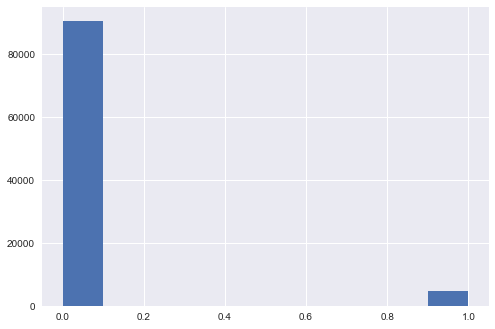

In [88]:
plt.hist(donate_all.TARGET_B)
plt.show()

In [56]:
donate_all['Recency of Giving'] = donate_all.MDMAUD[0]
donate_all['Recency of Giving'].value_counts()

XXXX    95412
Name: Recency of Giving, dtype: int64

In [57]:
donate_all.MDMAUD.value_counts()  #Most people are not major donors, indicated by the share of XXXX

XXXX    95118
C1CM       65
L1CM       44
I1CM       37
D2CM       28
C2CM       24
D1CM       20
L2CM       15
L1LM        8
C1LM        8
I2CM        7
D5MM        5
D5CM        5
D2MM        4
I1LM        3
C2LM        3
D5TM        3
C5CM        3
C2MM        3
C5TM        1
C1MM        1
L2TM        1
L2LM        1
C5MM        1
L1MM        1
I5CM        1
I2MM        1
I5MM        1
Name: MDMAUD, dtype: int64

In [128]:
donate_all.INCOME.value_counts()

5.0    15451
2.0    13114
4.0    12732
1.0     9022
3.0     8558
6.0     7778
7.0     7471
Name: INCOME, dtype: int64

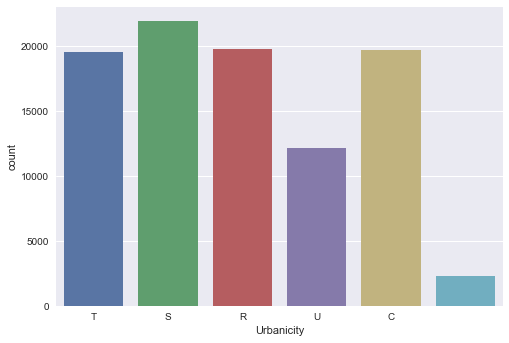

In [65]:
donate_all['Urbanicity'] = donate_all.DOMAIN.str[0]
donate_all['Urbanicity'].value_counts()
sns.countplot(data = donate_all, x = 'Urbanicity')
plt.show()

In [159]:
donate_all['Socioecon'] = donate_all.DOMAIN.str[1]
donate_all['Socioecon'].value_counts()


2    46040
1    28498
3    16754
4     1804
Name: Socioecon, dtype: int64

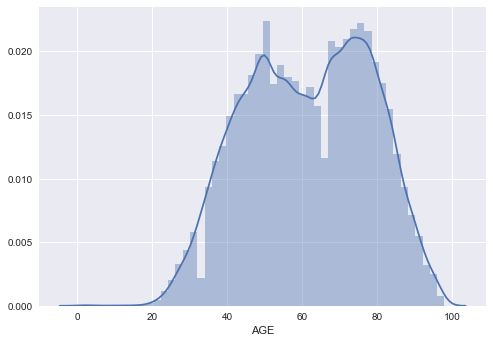

In [72]:
sns.distplot(donate_all['AGE'].dropna())
plt.show()

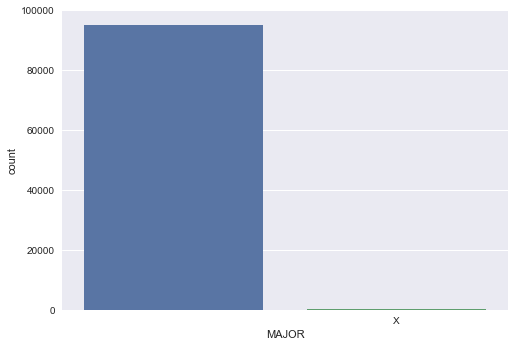

In [74]:
sns.countplot(x = 'MAJOR', data = donate_all)
plt.show()

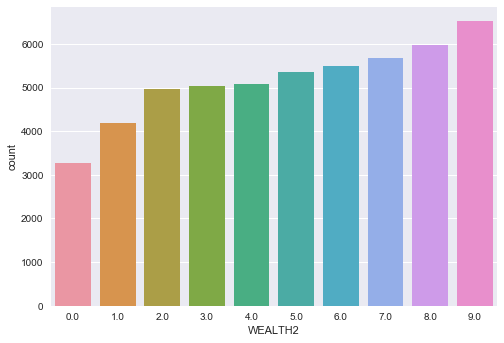

In [75]:
sns.countplot(x = 'WEALTH2', data = donate_all)
plt.show()

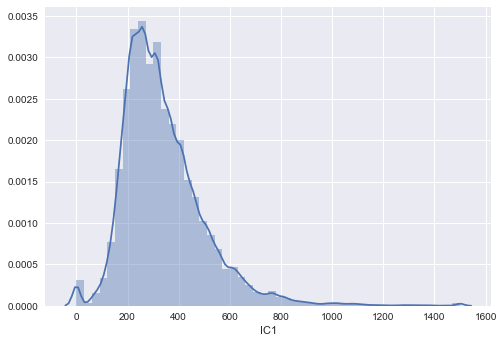

In [76]:
sns.distplot(donate_all['IC1'].dropna())
plt.show()

In [91]:
donate_all.RAMNT_3.value_counts()

10.0    37
5.0     31
7.0     21
20.0    20
15.0    18
3.0     15
25.0    13
8.0     12
9.0      9
12.0     9
14.0     8
6.0      8
4.0      6
50.0     6
2.0      5
11.0     4
16.0     3
13.0     2
23.0     2
30.0     2
17.0     2
21.0     2
18.0     1
3.5      1
40.0     1
29.0     1
22.0     1
19.0     1
35.0     1
Name: RAMNT_3, dtype: int64

In [84]:
len(donate_all.RFA_2)

95412

In [89]:
donate_all.RAMNTALL.describe()

count    95412.000000
mean       104.489351
std        118.580367
min         13.000000
25%         40.000000
50%         78.000000
75%        131.000000
max       9485.000000
Name: RAMNTALL, dtype: float64

In [93]:
donate_all.ADATE_2.value_counts()

9706    95399
9704       13
Name: ADATE_2, dtype: int64

In [94]:
donate_all.ADATE_3.value_counts()

9606.0    93444
9604.0       18
Name: ADATE_3, dtype: int64

In [99]:
donate_all.ADATE_8.value_counts()

9601.0    85468
9512.0     6360
9511.0       51
9603.0       18
9605.0        4
Name: ADATE_8, dtype: int64

In [17]:
donate.columns.tolist()

['ODATEDW',
 'OSOURCE',
 'TCODE',
 'STATE',
 'ZIP',
 'MAILCODE',
 'PVASTATE',
 'DOB',
 'NOEXCH',
 'RECINHSE',
 'RECP3',
 'RECPGVG',
 'RECSWEEP',
 'MDMAUD',
 'DOMAIN',
 'CLUSTER',
 'AGE',
 'AGEFLAG',
 'HOMEOWNR',
 'CHILD03',
 'CHILD07',
 'CHILD12',
 'CHILD18',
 'NUMCHLD',
 'INCOME',
 'GENDER',
 'WEALTH1',
 'HIT',
 'MBCRAFT',
 'MBGARDEN',
 'MBBOOKS',
 'MBCOLECT',
 'MAGFAML',
 'MAGFEM',
 'MAGMALE',
 'PUBGARDN',
 'PUBCULIN',
 'PUBHLTH',
 'PUBDOITY',
 'PUBNEWFN',
 'PUBPHOTO',
 'PUBOPP',
 'DATASRCE',
 'MALEMILI',
 'MALEVET',
 'VIETVETS',
 'WWIIVETS',
 'LOCALGOV',
 'STATEGOV',
 'FEDGOV',
 'SOLP3',
 'SOLIH',
 'MAJOR',
 'WEALTH2',
 'GEOCODE',
 'COLLECT1',
 'VETERANS',
 'BIBLE',
 'CATLG',
 'HOMEE',
 'PETS',
 'CDPLAY',
 'STEREO',
 'PCOWNERS',
 'PHOTO',
 'CRAFTS',
 'FISHER',
 'GARDENIN',
 'BOATS',
 'WALKER',
 'KIDSTUFF',
 'CARDS',
 'PLATES',
 'LIFESRC',
 'PEPSTRFL',
 'POP901',
 'POP902',
 'POP903',
 'POP90C1',
 'POP90C2',
 'POP90C3',
 'POP90C4',
 'POP90C5',
 'ETH1',
 'ETH2',
 'ETH3',
 'ETH4',
 'ET

In [14]:
donate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95412 entries, 0 to 95411
Columns: 481 entries, ODATEDW to GEOCODE2
dtypes: float64(97), int64(310), object(74)
memory usage: 350.1+ MB
